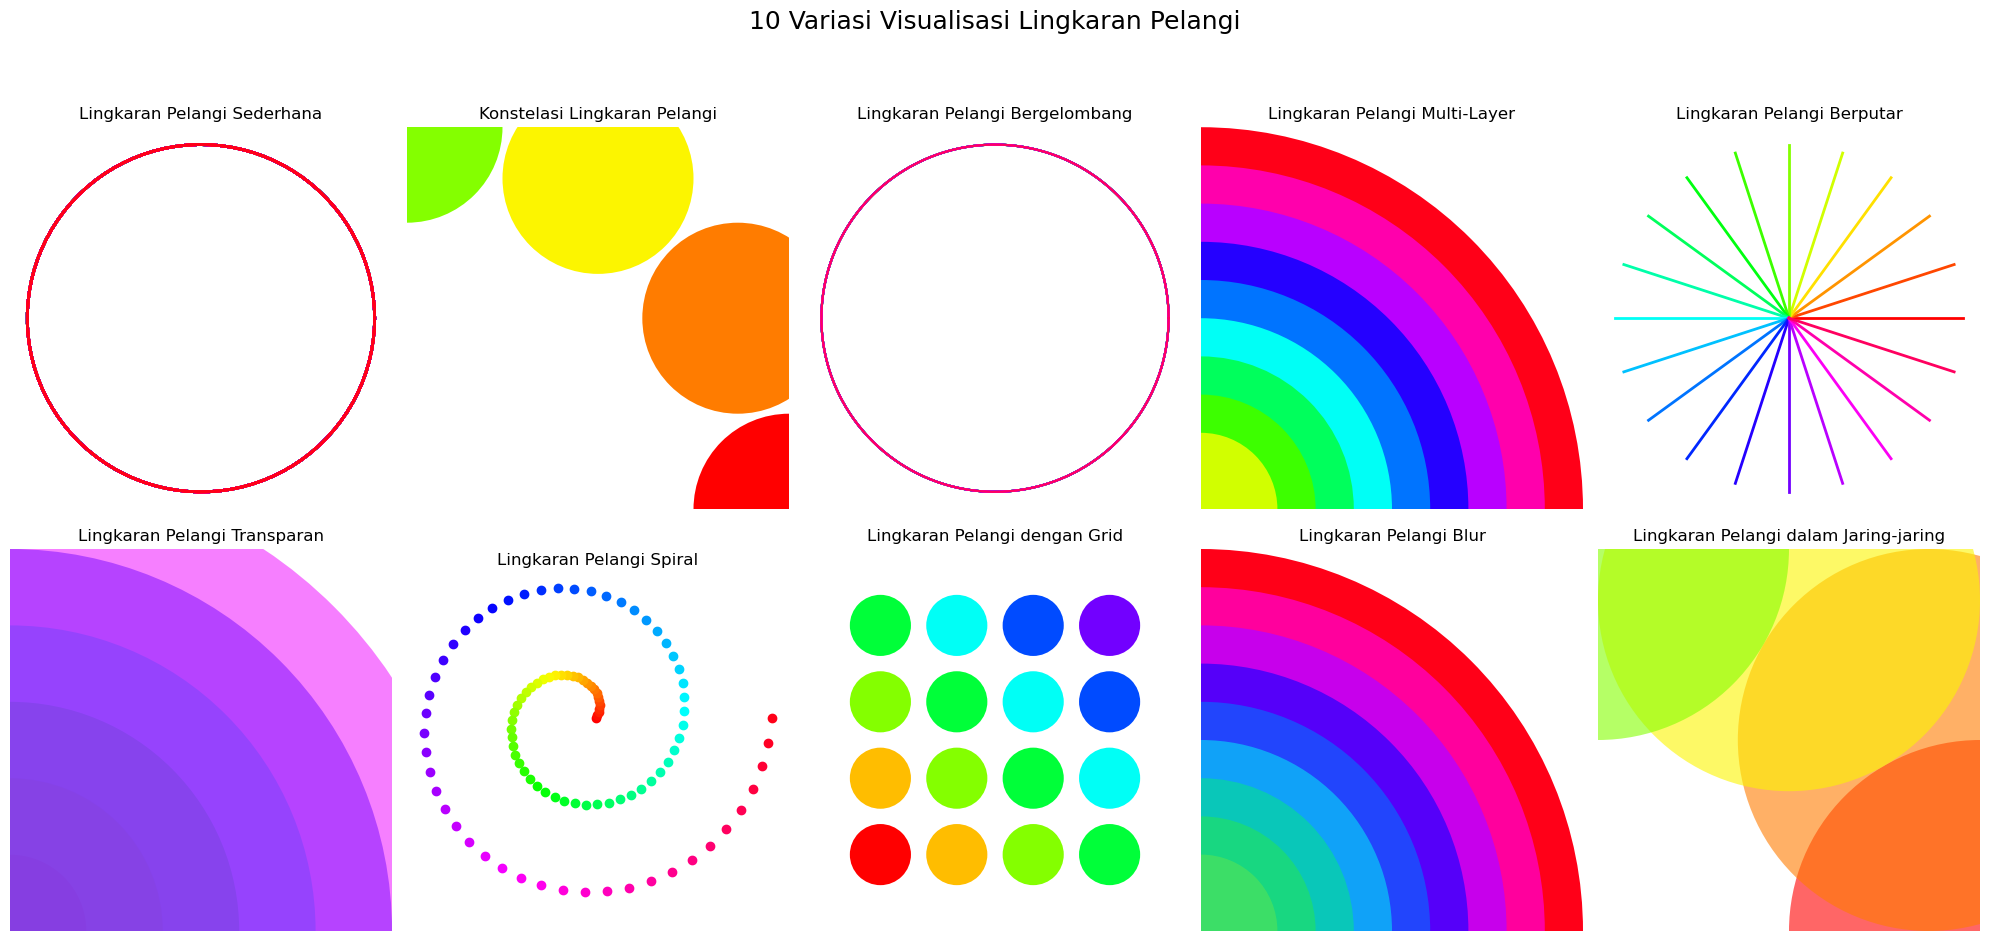

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import hsv_to_rgb

# Set figure properties
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("10 Variasi Visualisasi Lingkaran Pelangi", fontsize=18)

# 1. Lingkaran Pelangi Sederhana
ax = axs[0, 0]
theta = np.linspace(0, 2 * np.pi, 100)
radius = 1
colors = plt.cm.hsv(np.linspace(0, 1, 100))
for i, color in enumerate(colors):
    ax.plot(radius * np.cos(theta), radius * np.sin(theta), color=color, lw=2)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Sederhana")

# 2. Konstelasi Lingkaran Pelangi
ax = axs[0, 1]
n_circles = 12
angles = np.linspace(0, 2 * np.pi, n_circles, endpoint=False)
for i, angle in enumerate(angles):
    color = plt.cm.hsv(i / n_circles)
    x, y = np.cos(angle), np.sin(angle)
    circle = Circle((x, y), 0.25, color=color, ec='none')
    ax.add_patch(circle)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Konstelasi Lingkaran Pelangi")

# 3. Lingkaran Pelangi Bergelombang
ax = axs[0, 2]
t = np.linspace(0, 2 * np.pi, 100)
for i, phase in enumerate(np.linspace(0, 2 * np.pi, 20)):
    color = plt.cm.hsv(i / 20)
    ax.plot(np.cos(t + phase), np.sin(t + phase), color=color, lw=1.5)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Bergelombang")

# 4. Lingkaran Pelangi Multi-Layer
ax = axs[0, 3]
for i in range(10, 1, -1):
    color = plt.cm.hsv(i / 10)
    circle = Circle((0, 0), i * 0.1, color=color, ec='none')
    ax.add_patch(circle)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Multi-Layer")

# 5. Lingkaran Pelangi Berputar
ax = axs[0, 4]
for i in range(20):
    angle = i * np.pi / 10
    color = plt.cm.hsv(i / 20)
    ax.plot([0, np.cos(angle)], [0, np.sin(angle)], color=color, lw=2)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Berputar")

# 6. Lingkaran Pelangi Transparan
ax = axs[1, 0]
for i in range(6):
    color = plt.cm.hsv(i / 6)
    circle = Circle((0, 0), radius=(i + 1) * 0.2, color=color, alpha=0.5, ec='none')
    ax.add_patch(circle)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Transparan")

# 7. Lingkaran Pelangi Berbentuk Spiral
ax = axs[1, 1]
t = np.linspace(0, 4 * np.pi, 100)
r = np.linspace(0.1, 1, 100)
for i, angle in enumerate(t):
    color = plt.cm.hsv(angle / (4 * np.pi))
    ax.plot(r[i] * np.cos(angle), r[i] * np.sin(angle), 'o', color=color)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Spiral")

# 8. Lingkaran Pelangi dengan Grid
ax = axs[1, 2]
grid_size = 4
for i in range(grid_size):
    for j in range(grid_size):
        color = plt.cm.hsv((i + j) / (2 * grid_size))
        circle = Circle((i, j), 0.4, color=color, ec='none')
        ax.add_patch(circle)
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi dengan Grid")

# 9. Lingkaran Pelangi dengan Efek Blur
ax = axs[1, 3]
for i in range(10, 1, -1):
    color = plt.cm.hsv(i / 10)
    circle = Circle((0, 0), i * 0.1, color=color, alpha=0.1 * i, ec='none')
    ax.add_patch(circle)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi Blur")

# 10. Lingkaran Pelangi dalam Jaring-jaring
ax = axs[1, 4]
for i in range(12):
    angle = i * np.pi / 6
    color = plt.cm.hsv(i / 12)
    circle = Circle((np.cos(angle), np.sin(angle)), 0.5, color=color, alpha=0.6, ec='none')
    ax.add_patch(circle)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.set_title("Lingkaran Pelangi dalam Jaring-jaring")

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


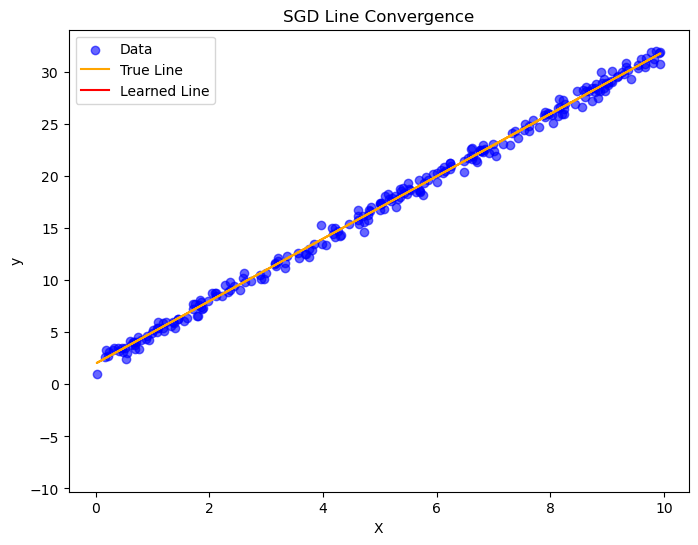

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate synthetic data
def generate_data(num_examples, true_w, true_b, noise_std=0.5):
    X = np.random.rand(num_examples) * 10  # Random inputs in range [0, 10)
    noise = np.random.randn(num_examples) * noise_std  # Gaussian noise
    y = true_w * X + true_b + noise
    return X, y

# Perform a single SGD step
def sgd_step(w, b, X, y, lr):
    idx = np.random.randint(0, len(X))  # Randomly pick an example
    x_i, y_i = X[idx], y[idx]
    grad_w = -2 * x_i * (y_i - (w * x_i + b))  # Gradient w.r.t. w
    grad_b = -2 * (y_i - (w * x_i + b))       # Gradient w.r.t. b
    w -= lr * grad_w
    b -= lr * grad_b
    return w, b

# Animate SGD and line convergence
def animate_sgd(learning_rate, batch_size, num_examples, steps, true_w, true_b):
    # Generate data
    X, y = generate_data(num_examples, true_w, true_b)
    
    # Initialize parameters
    w, b = np.random.randn(), np.random.randn()
    lines = []  # Store line objects for animation

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X, y, label="Data", color="blue", alpha=0.6)
    true_line, = ax.plot(X, true_w * X + true_b, label="True Line", color="orange")
    learned_line, = ax.plot(X, w * X + b, label="Learned Line", color="red")
    ax.legend()
    ax.set_title("SGD Line Convergence")
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    # Update function for animation
    def update(frame):
        nonlocal w, b
        for _ in range(batch_size):  # Perform batch_size updates per frame
            w, b = sgd_step(w, b, X, y, learning_rate)
        learned_line.set_ydata(w * X + b)
        lines.append((w, b))  # Store parameters for debugging or post-analysis
        return learned_line,

    # Animate
    ani = animation.FuncAnimation(
        fig, update, frames=steps, interval=200, blit=True, repeat=False
    )
    plt.show()

# Parameters
learning_rate = 0.05
batch_size = 1  # Single update per frame for smooth convergence visualization
num_examples = 256
true_w = 3.0
true_b = 2.0
steps = 50

# Run the animation
animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=steps, 
    true_w=true_w,
    true_b=true_b
)

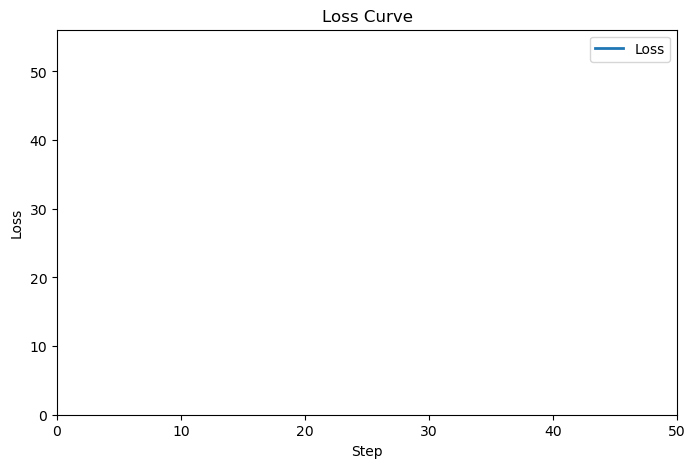

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate random data
np.random.seed(42)
num_examples = 256
x = np.random.uniform(-5, 5, num_examples)
true_w, true_b = 3.0, 2.0
y = true_w * x + true_b + np.random.normal(scale=2.0, size=num_examples)

# SGD Parameters
learning_rate = 0.05
steps = 50
batch_size = 32

# Initialize parameters
w, b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
losses = []

# Function to compute loss
def compute_loss(w, b, x, y):
    y_pred = w * x + b
    return np.mean((y_pred - y) ** 2)

# Function to perform SGD step
def sgd_step(w, b, x, y, learning_rate):
    indices = np.random.choice(len(x), batch_size, replace=False)
    x_batch = x[indices]
    y_batch = y[indices]
    y_pred = w * x_batch + b
    grad_w = 2 * np.mean((y_pred - y_batch) * x_batch)
    grad_b = 2 * np.mean(y_pred - y_batch)
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    return w, b

# Perform SGD and record loss
for step in range(steps):
    losses.append(compute_loss(w, b, x, y))
    w, b = sgd_step(w, b, x, y, learning_rate)

# Animation setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Loss Curve")
ax.set_xlim(0, steps)
ax.set_ylim(0, max(losses) * 1.1)
ax.set_xlabel("Step")
ax.set_ylabel("Loss")
line, = ax.plot([], [], lw=2, label="Loss")
ax.legend()

# Animation function
def update(frame):
    line.set_data(range(frame + 1), losses[:frame + 1])
    return line,

ani = FuncAnimation(fig, update, frames=steps, interval=200, blit=True)

plt.show()


RuntimeError: x must be a sequence

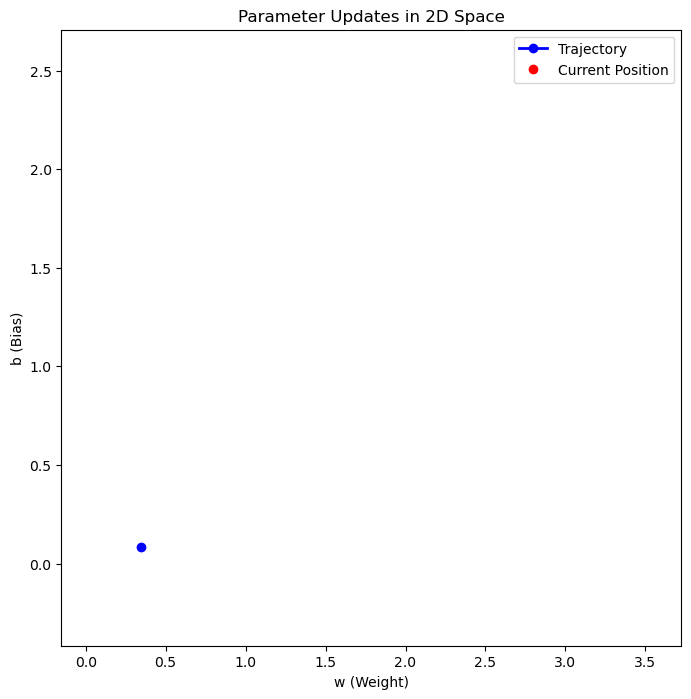

In [6]:
# Reset initial parameters for visualization of parameter updates
w, b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
parameters = [(w, b)]

# Perform SGD and record parameters
for step in range(steps):
    w, b = sgd_step(w, b, x, y, learning_rate)
    parameters.append((w, b))

# Extract parameter trajectories
w_vals, b_vals = zip(*parameters)

# Animation setup for parameter updates in 2D
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Parameter Updates in 2D Space")
ax.set_xlim(min(w_vals) - 0.5, max(w_vals) + 0.5)
ax.set_ylim(min(b_vals) - 0.5, max(b_vals) + 0.5)
ax.set_xlabel("w (Weight)")
ax.set_ylabel("b (Bias)")
line, = ax.plot([], [], 'b-o', lw=2, label="Trajectory")
point, = ax.plot([], [], 'ro', label="Current Position")
ax.legend()

# Animation function
def update_trajectory(frame):
    line.set_data(w_vals[:frame + 1], b_vals[:frame + 1])
    point.set_data(w_vals[frame], b_vals[frame])
    return line, point

ani_2d = FuncAnimation(fig, update_trajectory, frames=len(w_vals), interval=200, blit=True)

plt.show()


## How to extract jpg format to pdf using Python

In [11]:
from PIL import Image
import os

def jpg_to_pdf(jpg_folder, output_pdf):
    jpg_files = sorted(f for f in os.listdir(jpg_folder) if f.lower().endswith('.jpg'))
    
    if not jpg_files:
        print("No .jpg files found in the specified folder.")
        return

    images = [Image.open(os.path.join(jpg_folder, f)).convert('RGB') for f in jpg_files]
    images[0].save(output_pdf, save_all=True, append_images=images[1:])
    print(f"PDF created successfully: {output_pdf}")

jpg_to_pdf("Gambar/", "output.pdf")

PDF created successfully: output.pdf
